Mean Squared Error on test set: 0.0001
R² score on test set: 0.9999


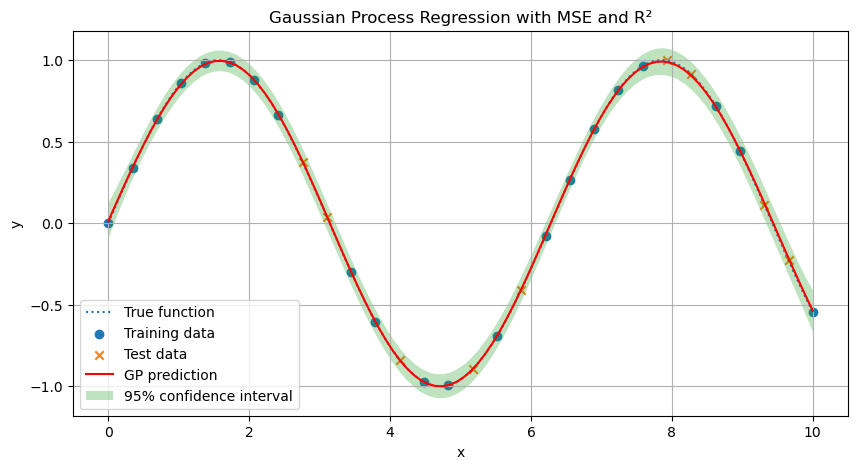

In [6]:
# Kriging - Gaussian process regression as a interpolation method with covariance function(as a kernel).

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score

def true_function(x):
    return np.sin(x)

# Generate dataset
X = np.atleast_2d(np.linspace(0, 10, 30)).T
y = true_function(X).ravel()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
)

# Define kernel with bounds for optimization
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Create the Gaussian Process model with a small noise level and normalization
gp = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-2,
    normalize_y=True,
    n_restarts_optimizer=10
)

# Fit the model
gp.fit(X_train, y_train)

# Prediction grid for visualization
X_pred = np.atleast_2d(np.linspace(0, 10, 100)).T
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Predict on test set
y_pred_test = gp.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print metrics
print(f"Mean Squared Error on test set: {mse:.4f}")
print(f"R² score on test set: {r2:.4f}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(X_pred, true_function(X_pred), ":", label="True function")
plt.scatter(X_train, y_train, marker="o", label="Training data")
plt.scatter(X_test, y_test, marker="x", label="Test data")
plt.plot(X_pred, y_pred, "-", label="GP prediction", color = "red")
plt.fill_between(
    X_pred.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval"
)
plt.legend()
plt.title("Gaussian Process Regression with MSE and R²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()